# SMS Spam Collection Dataset Extraction and Analysis

This script downloads and extracts the **SMS Spam Collection** dataset from the UCI Machine Learning Repository. The dataset is stored in a ZIP file, which is extracted and loaded into a Pandas DataFrame for further analysis.

## Installing Conda

If you don't have **conda** installed, follow the steps below:

### Installing Anaconda

1. Visit the [Anaconda Distribution](https://www.anaconda.com/products/distribution) page and download the installer for your operating system.
2. Follow the installation instructions provided on the website.
3. Open your terminal (or Anaconda Prompt on Windows) and verify the installation by running:
   ```bash
   conda --version
   ```


## Setting Up Your Conda Environment

After installing conda, create and activate a new environment for this project:

1. **Create a new environment (e.g., named `sms_spam`) with Python 3.9:**
   ```bash
   conda create --name sms_spam python=3.9
   ```

2. **Activate the environment:**
   ```bash
   conda activate sms_spam
   ```

3. **Install the required packages:**
   ```bash
   conda install -c conda-forge pandas requests matplotlib seaborn nltk scikit-learn imbalanced-learn xgboost wordcloud numpy scipy
   ```



In [59]:

import pandas as pd
import requests
import zipfile
import io

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"

# Download the ZIP file
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content), "r") as zip_ref:
    zip_ref.extractall("spam_dataset")  # Extract files to a folder

# Load the dataset (it's inside the extracted folder)
df = pd.read_csv(
    "spam_dataset/SMSSpamCollection", sep="\t", header=None, names=["label", "text"]
)

# Display first few rows
print(df.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [58]:

###############################################
# Check Dataset Overview
###############################################

# Check dataset size and structure
print(df.shape)  # Rows & Columns
print("*******")
print(df.info())  # Data types & Missing values


(5572, 2)
*******
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


/var/folders/b0/0l4ksqs93r57m4lrp4v92c700000gn/T/ipykernel_64488/2389302805.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["label"], palette="coolwarm")


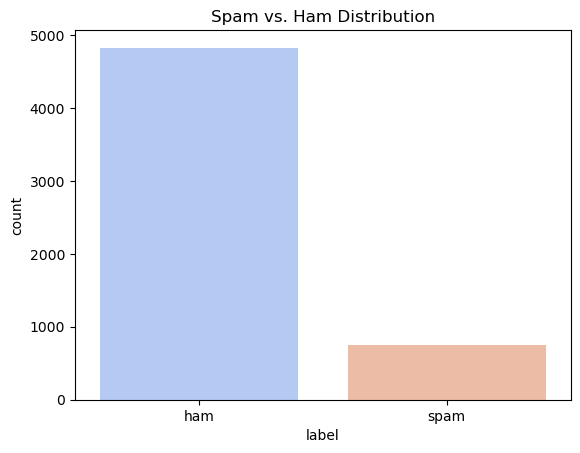

label
ham     4825
spam     747
Name: count, dtype: int64


In [35]:

###############################################
# Check Class Distribution (Spam vs. Ham)
###############################################
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot of spam vs ham messages
sns.countplot(x=df["label"], palette="coolwarm")
plt.title("Spam vs. Ham Distribution")
plt.show()

# Print counts
print(df["label"].value_counts())



In [36]:

###############################################
# Checking for Duplicate Messages/Rows
###############################################

print("Duplicate messages:", df.duplicated().sum())

# Remove duplicates if necessary
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

Duplicate messages: 403
After removing duplicates: (5169, 2)


In [37]:

###############################################
# Checking for Missing Rows
###############################################

print("Missing values:\n", df.isnull().sum())

Missing values:
 label    0
text     0
dtype: int64


In [38]:

###############################################
# Convert Labels to Numeric (Machine learning models require numerical labels.)
###############################################

df["label"] = df["label"].map({"ham": 0, "spam": 1})
df["label"] 


0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5169, dtype: int64

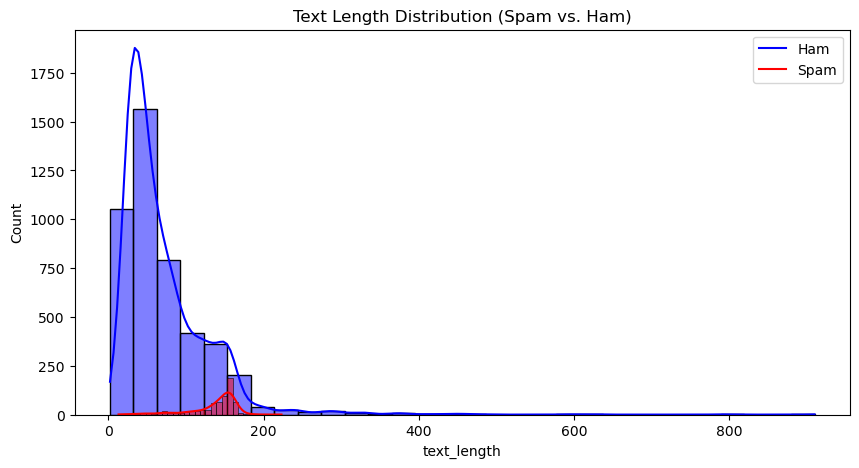

In [39]:

###############################################
# Check Text Length Distribution
###############################################

df["text_length"] = df["text"].apply(len)

# Histogram of text length distribution

plt.figure(figsize=(10, 5))
sns.histplot(
    df[df["label"] == 0]["text_length"], bins=30, kde=True, color="blue"
)
sns.histplot(
    df[df["label"] == 1]["text_length"], bins=30, kde=True, color="red"
)
plt.legend(labels=["Ham", "Spam"])  # Explicitly provide the labels
plt.title("Text Length Distribution (Spam vs. Ham)")
plt.show()



In [40]:

###############################################
#  Most Common Words in Spam vs. Ham
###############################################

from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))


# Function to get common words
def get_most_common_words(texts, n=20):
    words = (
        " ".join(texts)
        .lower()
        .translate(str.maketrans("", "", string.punctuation))
        .split()
    )
    words = [word for word in words if word not in stop_words]
    return Counter(words).most_common(n)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vignesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:

# Get common words for ham and spam
ham_words = get_most_common_words(df[df["label"] == 0]["text"])
spam_words = get_most_common_words(df[df["label"] == 1]["text"])

print("Most common words in HAM messages:", ham_words)
print("Most common words in SPAM messages:", spam_words)

Most common words in HAM messages: [('u', 891), ('im', 436), ('get', 295), ('2', 292), ('ltgt', 254), ('dont', 248), ('ok', 247), ('go', 242), ('got', 226), ('like', 221), ('know', 221), ('come', 211), ('ill', 207), ('good', 207), ('ur', 202), ('call', 186), ('time', 181), ('love', 173), ('ü', 169), ('day', 169)]
Most common words in SPAM messages: [('call', 303), ('free', 188), ('2', 155), ('txt', 126), ('u', 123), ('ur', 119), ('mobile', 105), ('stop', 105), ('text', 103), ('4', 97), ('claim', 96), ('reply', 93), ('prize', 81), ('get', 69), ('new', 64), ('send', 58), ('urgent', 58), ('nokia', 54), ('cash', 51), ('contact', 51)]


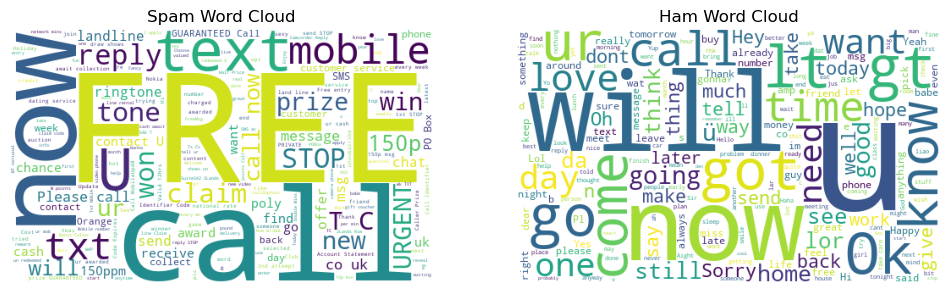

In [42]:

###############################################
# Word Cloud for Spam and Ham Messages
###############################################

from wordcloud import WordCloud

# Generate word clouds
spam_text = " ".join(df[df["label"] == 1]["text"])
ham_text = " ".join(df[df["label"] == 0]["text"])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(
    WordCloud(width=500, height=300, background_color="white").generate(spam_text)
)
plt.axis("off")
plt.title("Spam Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(
    WordCloud(width=500, height=300, background_color="white").generate(ham_text)
)
plt.axis("off")
plt.title("Ham Word Cloud")

plt.show()


In [43]:

###############################################
# Text Preprocessing and Vectorization
###############################################

"""

Before training the model, we need to:

1. Convert text data into numerical format using TF-IDF Vectorization.
2. Split the dataset into training and testing sets.

"""

from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data to numerical representation using TF-IDF
vectorizer = TfidfVectorizer(
    stop_words="english", max_features=5000
)  # Use top 5000 words
X = vectorizer.fit_transform(df["text"])  # Transform text into TF-IDF features
y = df["label"]  # Target variable (spam=1, ham=0)


In [44]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 36220 stored elements and shape (5169, 5000)>
  Coords	Values
  (0, 2713)	0.3141908523215485
  (0, 948)	0.3110545277099226
  (0, 486)	0.3053647769102427
  (0, 675)	0.33963024527518443
  (0, 1511)	0.2248139644231751
  (0, 4843)	0.2843345239792958
  (0, 1847)	0.33963024527518443
  (0, 674)	0.38421744478905134
  (0, 815)	0.33963024527518443
  (0, 1498)	0.1883560339606837
  (0, 4641)	0.22527083938740097
  (1, 2311)	0.27648020550267416
  (1, 1860)	0.4069559282570589
  (1, 1787)	0.5233829050336306
  (1, 4749)	0.4304762931688979
  (1, 2337)	0.5465400846779285
  (2, 1388)	0.11813182992258885
  (2, 1210)	0.3687653745077637
  (2, 4801)	0.20229721324848596
  (2, 874)	0.1996370491045294
  (2, 4761)	0.15421376674648976
  (2, 1268)	0.4944351766743667
  (2, 968)	0.20852528327605138
  (2, 1330)	0.1891791307454854
  (2, 4189)	0.23590081457357054
  :	:
  (5164, 905)	0.23036811566820828
  (5164, 668)	0.26567827877792594
  (5164, 2113)	0.285328

In [45]:

###############################################
# Split Data for Training & Testing
###############################################

from sklearn.model_selection import train_test_split

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (4135, 5000)
Testing set size: (1034, 5000)


In [46]:

###############################################
# Check Class Distribution After Splitting
###############################################

# Check distribution in training and testing sets
train_distribution = y_train.value_counts(normalize=True) * 100  # Percentage format
test_distribution = y_test.value_counts(normalize=True) * 100  # Percentage format

print("Class distribution in Training Set:")
print(train_distribution)

print("\nClass distribution in Testing Set:")
print(test_distribution)

Class distribution in Training Set:
label
0    87.593712
1    12.406288
Name: proportion, dtype: float64

Class distribution in Testing Set:
label
0    86.460348
1    13.539652
Name: proportion, dtype: float64


In [47]:


###############################################
# Apply SMOTE for Oversampling
###############################################

"""

SMOTE generates synthetic samples for the minority class (spam), making the dataset balanced.
sampling_strategy='auto' balances both classes equally.
It is only applied to the training set to prevent data leakage.

"""

from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42)

# Apply SMOTE only on training data (to avoid data leakage)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts(normalize=True) * 100)

Class distribution after SMOTE:
label
0    50.0
1    50.0
Name: proportion, dtype: float64


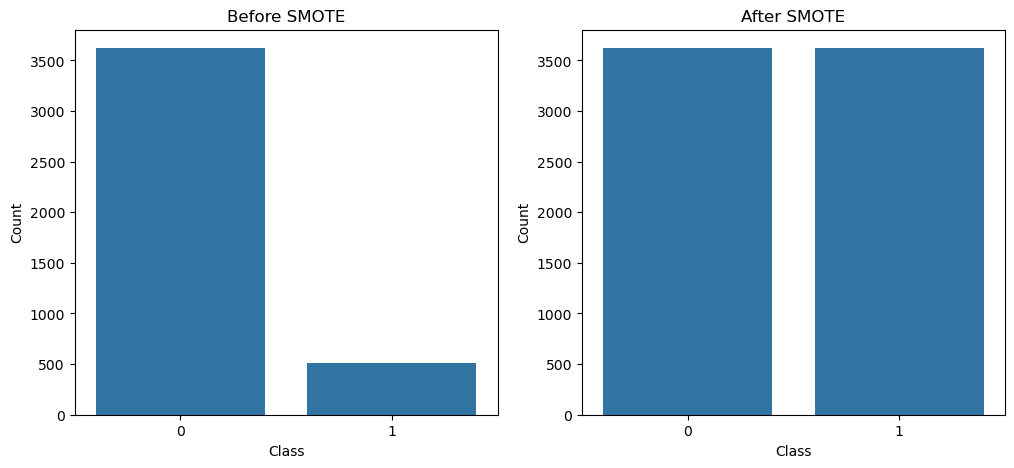

In [48]:

###############################################
# Verify Class Distribution
###############################################

import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
sns.barplot(x=y_train.value_counts().index, y=y_train.value_counts(), ax=ax[0])
ax[0].set_title("Before SMOTE")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Count")

# After SMOTE
sns.barplot(
    x=y_train_resampled.value_counts().index,
    y=y_train_resampled.value_counts(),
    ax=ax[1],
)
ax[1].set_title("After SMOTE")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Count")

plt.show()

In [49]:

###############################################
# Train Logistic Regression Model on Balanced Data
###############################################

from sklearn.linear_model import LogisticRegression

# Train logistic regression model on the balanced dataset
model_smote = LogisticRegression()
model_smote.fit(X_train_resampled, y_train_resampled)

# Predict on the original test set
y_pred_smote = model_smote.predict(X_test)

Classification Report after SMOTE:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       894
           1       0.90      0.91      0.91       140

    accuracy                           0.97      1034
   macro avg       0.94      0.95      0.95      1034
weighted avg       0.98      0.97      0.97      1034



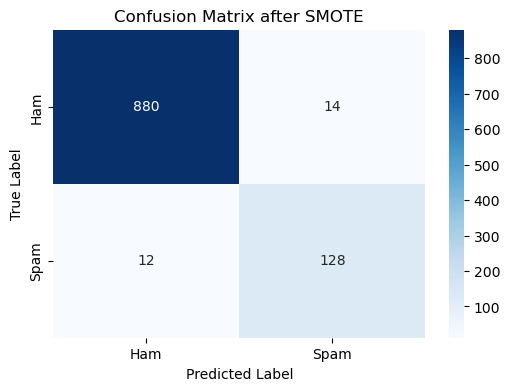

In [50]:

###############################################
# Evaluate the Model
###############################################

from sklearn.metrics import classification_report, confusion_matrix

# Print evaluation metrics
print("Classification Report after SMOTE:")
print(classification_report(y_test, y_pred_smote))

# Confusion matrix
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)

# Visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix_smote,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Ham", "Spam"],
    yticklabels=["Ham", "Spam"],
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix after SMOTE")
plt.show()


In [51]:
# Hyperparameter Tuning - Logistic Regression
###############################################

# Import necessary libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Section 1: Basic GridSearchCV - Regularization Tuning (Initial Step)
###############################################

# Define hyperparameters to tune
param_grid = {
    "C": [0.01, 0.1, 1, 10, 50, 100, 250, 500, 1000]  # Regularization strength
}

# Use GridSearchCV for best parameter selection with 5-fold cross-validation
grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000), param_grid, cv=5, scoring="roc_auc"
)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Extract and print the best model and the best regularization parameter
best_model = grid_search.best_estimator_
print(f"Best Regularization Parameter: {grid_search.best_params_['C']}")


Best Regularization Parameter: 50


In [52]:

###############################################
# Hyperparameter Tuning - RandomizedSearchCV
###############################################

# Section 3: RandomizedSearchCV for ElasticNet Regularization
# Define the hyperparameter distribution for RandomizedSearchCV
param_dist = {
    "C": np.logspace(-3, 3, 20),  # Log scale for wide range sampling
    "penalty": ["elasticnet"],  # ElasticNet penalty
    "l1_ratio": np.linspace(0, 1, 20),  # Randomly sample ratio between 0 and 1
}

# Use RandomizedSearchCV for a faster random sampling over the hyperparameter space
# n_iter defines how many random combinations to sample
random_search = RandomizedSearchCV(
    LogisticRegression(max_iter=1000, solver="saga"),
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,  # Use all available CPU cores
    random_state=42,  # For reproducibility
)

# Fit the RandomizedSearchCV model
random_search.fit(X_train_resampled, y_train_resampled)

# Extract and print the best model and parameters from RandomizedSearchCV
print(
    f"Best Regularization Parameter (C) from RandomizedSearchCV: {random_search.best_params_['C']}"
)
print(
    f"Best L1 Ratio from RandomizedSearchCV: {random_search.best_params_['l1_ratio']}"
)

Best Regularization Parameter (C) from RandomizedSearchCV: 26.366508987303554
Best L1 Ratio from RandomizedSearchCV: 0.0


In [53]:
###############################################
# Train Logistic Regression Model Best Hyperparameters
###############################################

from sklearn.linear_model import LogisticRegression

# Train logistic regression model on the balanced dataset
model_best = LogisticRegression(C = random_search.best_params_['C'], penalty = "elasticnet",
 l1_ratio = 0.0, solver = "saga", max_iter = 1000)
model_best.fit(X_train_resampled, y_train_resampled)

# Predict on the original test set
y_pred_smote = model_best.predict(X_test)

Classification Report after SMOTE:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       894
           1       0.88      0.96      0.91       140

    accuracy                           0.98      1034
   macro avg       0.93      0.97      0.95      1034
weighted avg       0.98      0.98      0.98      1034



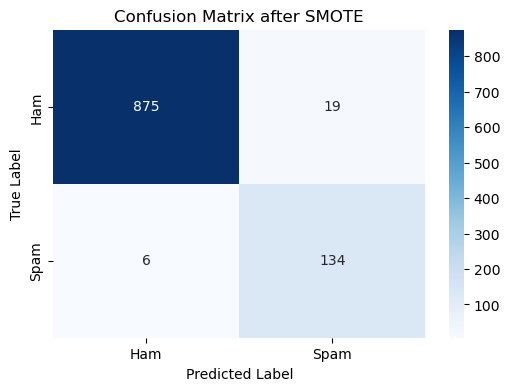

In [54]:

###############################################
# Evaluate the Model
###############################################

from sklearn.metrics import classification_report, confusion_matrix

# Print evaluation metrics
print("Classification Report after SMOTE:")
print(classification_report(y_test, y_pred_smote))

# Confusion matrix
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)

# Visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix_smote,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Ham", "Spam"],
    yticklabels=["Ham", "Spam"],
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix after SMOTE")
plt.show()


In [ ]:

###############################################
# Save the Final Model and Vectorizer for Future Use
###############################################

import joblib

# Save the best model and vectorizer for future predictions
joblib.dump(model_best, "best_spam_classifier_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


In [56]:

###############################################
# Load and Test the Saved Model (Optional)
###############################################

# Load the model and vectorizer to make predictions later
loaded_model = joblib.load("best_spam_classifier_model.pkl")
loaded_vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Test the saved model with a new message
new_message = ["Congratulations, you've won a $1000 gift card! Click here to claim."]
new_message_transformed = loaded_vectorizer.transform(new_message)
prediction = loaded_model.predict(new_message_transformed)

# Print prediction result (0 = Ham, 1 = Spam)
print(f"The new message is classified as: {'Spam' if prediction[0] == 1 else 'Ham'}")


The new message is classified as: Spam
